<a href="https://colab.research.google.com/github/pritsorathiya5181/UserRetentionSystem/blob/main/PDS_A2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1><center>CSCI - 4146 - The Process of Data Science - Summer 2022</h1></center>
<h1><center>Assignment 2 (Group 4)</h1></center>

<b>Prit Ajaykumar Sorathiya</b>  
<B00890175\>  


<b>Jaimi Maheshbhai Sheta</b>  
<B00886563\>  

In [ ]:
# reference: https://github.com/wkentaro/gdown
# Downloading dataset from the drive in this environment
!gdown --id 10CD10npr3J7qWOVAqlWUMB7_6CMMLm1_ 
!unzip archive.zip

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=10CD10npr3J7qWOVAqlWUMB7_6CMMLm1_
To: /content/archive.zip
100% 323k/323k [00:00<00:00, 88.2MB/s]
Archive:  archive.zip
replace archive/Telco-Customer-Churn - Assignment2.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: archive/Telco-Customer-Churn - Assignment2.csv  
  inflating: __MACOSX/archive/._Telco-Customer-Churn - Assignment2.csv  
  inflating: archive/WA_Fn-UseC_-Telco-Customer-Churn.csv  
  inflating: __MACOSX/archive/._WA_Fn-UseC_-Telco-Customer-Churn.csv  


In [ ]:
!pip install scikit-multiflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


###  Import Packages and libraries

In [ ]:
import pandas as pd
import numpy as np

### Read CSV files<a id='top'></a>

In [ ]:
teams_data = pd.read_csv("/content/archive/Telco-Customer-Churn - Assignment2.csv")
kaggle_data = pd.read_csv("/content/archive/WA_Fn-UseC_-Telco-Customer-Churn.csv")
  
final_df = pd.merge(teams_data, kaggle_data[['customerID','tenure', 'MultipleLines']], on=["customerID"])
final_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,PhoneService,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,...,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Date,tenure,MultipleLines
0,0002-ORFBO,Female,0,Yes,Yes,Yes,DSL,No,No,No,...,No,One year,Yes,Electronic Check,65.6,593.30,No,"01 Jan, 2010",9,No
1,0003-MKNFE,Male,0,No,No,Yes,No,No internet service,No internet service,No internet service,...,No internet service,Month-to-month,Yes,Mailed Check,59.9,542.40,No,"01 Jan, 2010",9,Yes
2,0004-TLHLJ,Male,0,No,No,Yes,DSL,No,No,No,...,No,Month-to-month,Yes,Credit card (automatic),73.9,280.85,Yes,"01 Jan, 2010",4,No
3,0011-IGKFF,Male,1,Yes,No,Yes,DSL,No,No,No,...,No,Month-to-month,Yes,Credit card (automatic),98.0,1237.85,Yes,"02 Jan, 2010",13,No
4,0013-EXCHZ,Female,1,Yes,No,Yes,DSL,Yes,Yes,No,...,No,Month-to-month,Yes,Electronic Check,83.9,267.40,Yes,"03 Jan, 2010",3,No


## Task 1. Data understanding and feature engineering

### A. Extract the numerical and categorical features from the dataset and build the data quality report.

From the below displayed table, we can identify the numerical and categorical attributes. 
1. Numerical Attributes: ['customerID', 'tenure', 'MonthlyCharges', 'TotalCharges']
2. Categorical Attributes: ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'InternetService', 'OnlineSecurity' 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']


In [ ]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   PhoneService      7043 non-null   object 
 6   InternetService   7043 non-null   object 
 7   OnlineSecurity    7043 non-null   object 
 8   OnlineBackup      7043 non-null   object 
 9   DeviceProtection  7043 non-null   object 
 10  TechSupport       7043 non-null   object 
 11  StreamingTV       7043 non-null   object 
 12  StreamingMovies   7043 non-null   object 
 13  Contract          7043 non-null   object 
 14  PaperlessBilling  7043 non-null   object 
 15  PaymentMethod     7043 non-null   object 
 16  MonthlyCharges    7043 non-null   float64


### Data Quality Report

One major discipline of data preparation is dealing with data quality issues. Before we can do anything meaningful with your data, it is essential to prepare clean and valuable data. So, it is the first step to build a data quality report. In order to create a data quality reports for both continuous and categorical features, we have first identified and differentiated all features in these two groups: continuous features and categorical features. Data quality report is used to identify following information in the attributes,
*	What are the Data Types? 
*	Does attribute contain any missing values?
*	How many unique values are in attribute?
*	And what is the maximum value of the attribute? 

This information is essential to analyze the datasets and gather understanding of preprocessing of the data. Below result indicates the data quality report for numerical features and categorical features. We can identify the data types, missing values, unique values, and maximum values for all the features. So, using this generated report, we can make further quality decision to preprocess and generate prediction model. 

In [ ]:
# reference: https://www.pschwan.de/how-to/setting-up-data-quality-reports-with-pandas-in-no-time
# data quality report
def getDataQualityReport(data):
    # Adding the data types of our data
    data_types = pd.DataFrame(data.dtypes,columns=['Data Type'])

    # Checking for missing data
    missing_data = pd.DataFrame(data.isnull().sum(),columns=['Missing Values'])

    # Check if the values are unique
    unique_values = pd.DataFrame(columns=['Unique Values'])
    for row in list(data.columns.values):
        unique_values.loc[row] = [data[row].nunique()]

    # Add min or max values, if they are relevant,
    maximum_values = pd.DataFrame(columns=['Maximum Value'])
    for row in list(data.columns.values):
        maximum_values.loc[row] = [data[row].max()]

    # generate the overview by df.join(other_df)
    dq_report = data_types.join(missing_data).join(unique_values).join(maximum_values)
    return dq_report

df = pd.DataFrame(final_df, columns=final_df.columns)
print("Data Quality Report: ")
print(getDataQualityReport(df))

Data Quality Report: 
                 Data Type  Missing Values Unique Values Maximum Value
customerID          object               0          7043    9995-HOTOH
gender              object               0             2          Male
SeniorCitizen        int64               0             2             1
Partner             object               0             2           Yes
Dependents          object               0             2           Yes
PhoneService        object               0             2           Yes
InternetService     object               0             3            No
OnlineSecurity      object               0             3           Yes
OnlineBackup        object               0             3           Yes
DeviceProtection    object               0             3           Yes
TechSupport         object               0             3           Yes
StreamingTV         object               0             3           Yes
StreamingMovies     object               0             

### B. Identify data quality issues and build the data quality plan. 

#### Issues: 
1. Dataset contains 11 missing values in TotalCharges feature: So, we can replace all NaN values with some appropriate values.
2. Delete CustomerID and Date attributes: as CustomerID and Date does not contain any significance in the dataset. So those columns are unnecessary and can be remove during the processing of the dataset.
3. Feature names are continuing both capital and lower letters: all the attributes’ names are combination of both capital-case and lower-case letters. So, we can make all columns’ names unifies by converting to all to lower-case letters.

#### Plans:
1. We have identified all those 11 TotalCharges missing values containing records from the dataset and replace all those with the zero (0). After performing this step, we have no record with the any missing values.
2. We have removed CustomerID and Date attributes from the dataset and keep the rest of dataset as it is for reducing the complexity of the given dataset.
3. We have performed data normalization operation on MonthlyCharges and TotalCharges features. By executing this operation, all the values of both of these attributes are residing in the range between 0 and 1. 
4. As the columns names are combination of both upper-case and lower-case letters, so we have made all of them unified by converting all letters to lower-case. 
5. Dataset has multiple categorical columns which have data types “Object”, so which makes unable to find significance on machine learning model. Therefore, we have performed OrdinalEncoding to convert all of those categorical values into binary values (0 and 1). 

### C. Preprocess your data according to the data quality plan

Plan1. Process and remove TotalCharges attribute 

In [ ]:
# resource: https://stackoverflow.com/questions/30447083/python-pandas-return-only-those-rows-which-have-missing-values 
# Indentify all the missing values containing records

from IPython.core.display import display_json

null_records = df[df.isnull().any(axis=1)]
print("Missing values:", len(null_records))
display(null_records)

Missing values: 11


,customerID,gender,SeniorCitizen,Partner,Dependents,PhoneService,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,...,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Date,tenure,MultipleLines
945,1371-DWPAZ,Female,0,Yes,Yes,Yes,No,No internet service,No internet service,No internet service,...,No internet service,Two year,Yes,Bank transfer (automatic),56.05,NaN,No,"04 Jul, 2011",0,No phone service
1731,2520-SGTTA,Female,0,Yes,Yes,Yes,No,No internet service,No internet service,No internet service,...,No internet service,Two year,Yes,Mailed Check,20.00,NaN,No,"09 Oct, 2012",0,No
1906,2775-SEFEE,Male,0,No,Yes,Yes,No,No internet service,No internet service,No internet service,...,No internet service,Two year,Yes,Bank transfer (automatic),61.90,NaN,No,"13 Jan, 2013",0,Yes
2025,2923-ARZLG,Male,0,Yes,Yes,Yes,DSL,No,No,No,...,No,One year,Yes,Credit card (automatic),19.70,NaN,No,"05 Apr, 2013",0,No
2176,3115-CZMZD,Male,0,No,Yes,Yes,DSL,Yes,No,No,...,No,Two year,Yes,Electronic Check,20.25,NaN,No,"16 Jun, 2013",0,No
2250,3213-VVOLG,Male,0,Yes,Yes,Yes,Fiber optic,Yes,No,No,...,No,Two year,Yes,Electronic Check,25.35,NaN,No,"30 Jul, 2013",0,Yes
2855,4075-WKNIU,Female,0,Yes,Yes,Yes,Fiber optic,No,No,No,...,No,Two year,Yes,Electronic Check,73.35,NaN,No,"20 Jul, 2014",0,Yes
3052,4367-NUYAO,Male,0,Yes,Yes,Yes,DSL,No,Yes,No,...,Yes,Two year,Yes,Credit card (automatic),25.75,NaN,No,"07 Nov, 2014",0,Yes
3118,4472-LVYGI,Female,0,Yes,Yes,Yes,Fiber optic,Yes,No,No,...,No,Two year,Yes,Electronic Check,52.55,NaN,No,"13 Dec, 2014",0,No phone service
4054,5709-LVOEQ,Female,0,Yes,Yes,No,Fiber optic,No,Yes,No,...,Yes,Two year,Yes,Bank transfer (automatic),80.85,NaN,No,"13 May, 2016",0,No


In [ ]:
# resource: https://sparkbyexamples.com/pandas/pandas-replace-nan-values-by-zero-in-a-column/
# replce all the NaN TotalCharges with 0.

df['TotalCharges'] = df["TotalCharges"].fillna(0)
df[df.isnull().any(axis=1)].sum()

customerID          0.0
gender              0.0
SeniorCitizen       0.0
Partner             0.0
Dependents          0.0
PhoneService        0.0
InternetService     0.0
OnlineSecurity      0.0
OnlineBackup        0.0
DeviceProtection    0.0
TechSupport         0.0
StreamingTV         0.0
StreamingMovies     0.0
Contract            0.0
PaperlessBilling    0.0
PaymentMethod       0.0
MonthlyCharges      0.0
TotalCharges        0.0
Churn               0.0
Date                0.0
tenure              0.0
MultipleLines       0.0
dtype: float64

Plan2. Remove customerID and Date attributes from the dataset

In [ ]:
# remove customerID cloumn from the dataset
df.drop(['customerID', 'Date'], axis=1, inplace=True)
print(df.columns)

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges',
       'Churn', 'tenure', 'MultipleLines'],
      dtype='object')


Plan3. Data Normalization of MonthlyCharges and TotalCharges

In [ ]:
# resource: https://stackoverflow.com/questions/26414913/normalize-columns-of-pandas-data-frame
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler(feature_range = (0,1))
# normalize MonthlyCharges data
df['MonthlyCharges'] = min_max_scaler.fit_transform(df[['MonthlyCharges']])

# normalize TotalCharges data
df['TotalCharges'] = min_max_scaler.fit_transform(df[['TotalCharges']])

# normalize tenure data
df['tenure'] = min_max_scaler.fit_transform(df[['tenure']])
df[['MonthlyCharges', 'TotalCharges']]

,MonthlyCharges,TotalCharges
0,0.471144,0.068315
1,0.414428,0.062454
2,0.553731,0.032338
3,0.793532,0.142531
4,0.653234,0.030789
...,...,...
7038,0.367164,0.085540
7039,0.665174,0.215745
7040,0.318905,0.010680
7041,0.493532,0.532845


Plan4. Make all column names unified. 

In [ ]:
# reference: https://stackoverflow.com/questions/19726029/how-can-i-make-pandas-dataframe-column-headers-all-lowercase
df.columns = df.columns.str.lower()
df.columns

Index(['gender', 'seniorcitizen', 'partner', 'dependents', 'phoneservice',
       'internetservice', 'onlinesecurity', 'onlinebackup', 'deviceprotection',
       'techsupport', 'streamingtv', 'streamingmovies', 'contract',
       'paperlessbilling', 'paymentmethod', 'monthlycharges', 'totalcharges',
       'churn', 'tenure', 'multiplelines'],
      dtype='object')

Plan5. Convert all the categorical variables into binary values using OrdinalEncoding

In [ ]:
dummy_df = df.copy(deep=True)

In [ ]:
# reference: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OrdinalEncoder.html
from sklearn.preprocessing import OrdinalEncoder

encoder = OrdinalEncoder()

columns = ['gender', 'seniorcitizen', 'partner', 'dependents', 'phoneservice', 'internetservice', 'onlinesecurity', 'onlinebackup', 
           'deviceprotection', 'techsupport', 'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling', 'paymentmethod', 'multiplelines']

dummy_df[columns] = encoder.fit_transform(dummy_df[columns])
# for column in columns: 
dummy_df['churn'] = dummy_df['churn'].replace(to_replace=dummy_df['churn'].unique(), value= list(range(0, len(dummy_df['churn'].unique()))))

dummy_df.head()

,gender,seniorcitizen,partner,dependents,phoneservice,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn,tenure,multiplelines
0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,2.0,0.471144,0.068315,0,0.125000,0.0
1,1.0,0.0,0.0,0.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,3.0,0.414428,0.062454,0,0.125000,2.0
2,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.553731,0.032338,1,0.055556,0.0
3,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.793532,0.142531,1,0.180556,0.0
4,0.0,1.0,1.0,0.0,1.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,0.653234,0.030789,1,0.041667,0.0


In [ ]:
# Data quality report after performing all the mentioned data planning steps
print(getDataQualityReport(dummy_df))

                 Data Type  Missing Values Unique Values  Maximum Value
gender             float64               0             2            1.0
seniorcitizen      float64               0             2            1.0
partner            float64               0             2            1.0
dependents         float64               0             2            1.0
phoneservice       float64               0             2            1.0
internetservice    float64               0             3            2.0
onlinesecurity     float64               0             3            2.0
onlinebackup       float64               0             3            2.0
deviceprotection   float64               0             3            2.0
techsupport        float64               0             3            2.0
streamingtv        float64               0             3            2.0
streamingmovies    float64               0             3            2.0
contract           float64               0             3        

### D. Explore the data set to find patterns in the data (e.g. correlation, trends, etc) and potentially form some hypotheses.

#### Heatmap Correlation

A heatmap is a graphical representation of correlation between individual attributes, where individual attributes of a matrix are represented as colors. To plot the heatmap correlation among the different variables, we have used matplotlib library to do it.

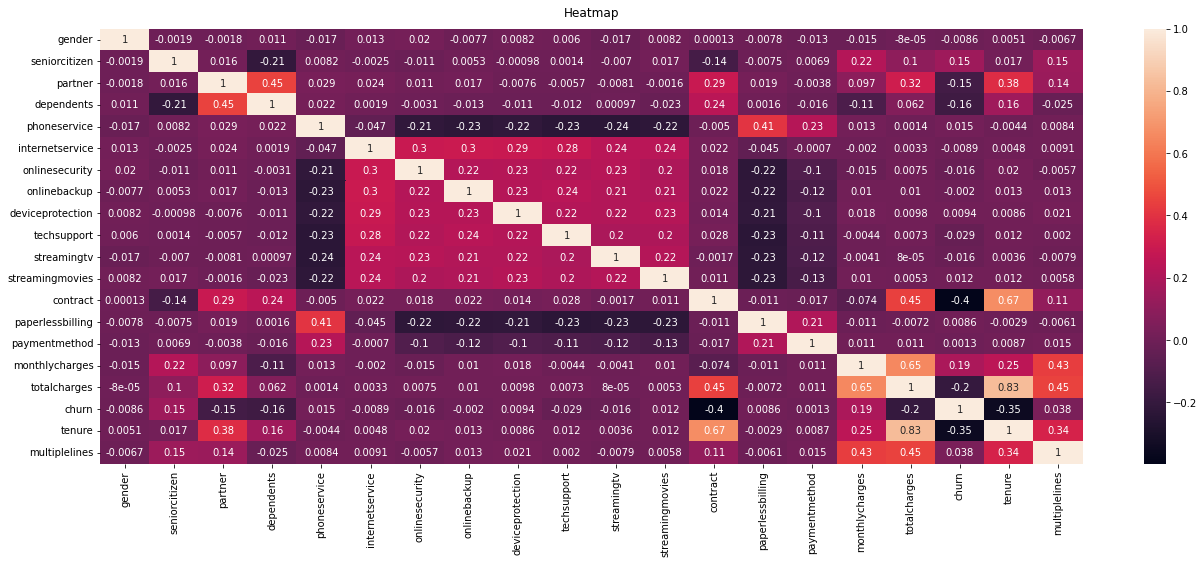

In [ ]:
# reference: https://www.geeksforgeeks.org/display-the-pandas-dataframe-in-heatmap-style/
# plot heatmap to find correlation betweens the data
import matplotlib.pyplot as plt
import seaborn as sns

plt.subplots(figsize=(22,8))
heatmap = sns.heatmap(dummy_df.corr(), annot=True);
heatmap.set_title('Heatmap', pad=12);

###### i) Customer Account Information: Consider the tenure, and contract variables, and then plot graphs and describe your observations.

To identify the relation between the tenure and number of customers, we have plotted histogram. From the below figure, we can say that most of customers are left the telcom during or after very first month, while some large numbers of customers are also last for a more than 80 months. 

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Customers vs Tenure')

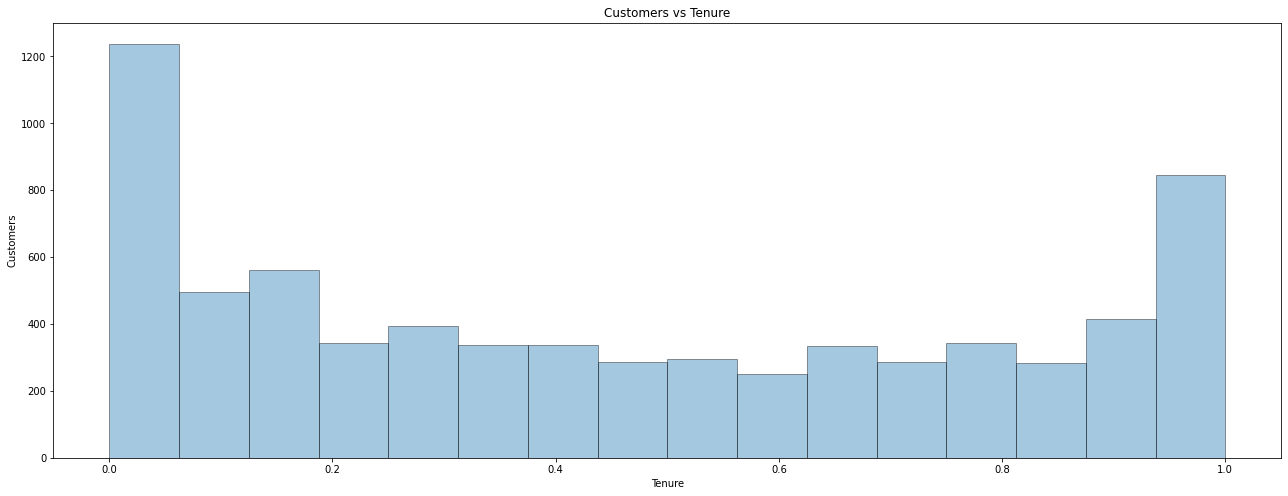

In [ ]:
# reference: https://seaborn.pydata.org/generated/seaborn.distplot.html

plt.subplots(figsize=(22,8))
ax = sns.distplot(df['tenure'], hist=True, kde=False, hist_kws={'edgecolor':'black'})
ax.set_xlabel('Tenure')
ax.set_ylabel('Customers')
ax.set_title('Customers vs Tenure')

Below bar graph illustrates the correlation between number of customers and three different contract length. We can identify that majorly customers are preferring month-to-month contact over one-year and two-year contacts. Also, almost same number of customers are opting for one-year and two-year contracts. 

Text(0.5, 1.0, 'Customers Vs Contract')

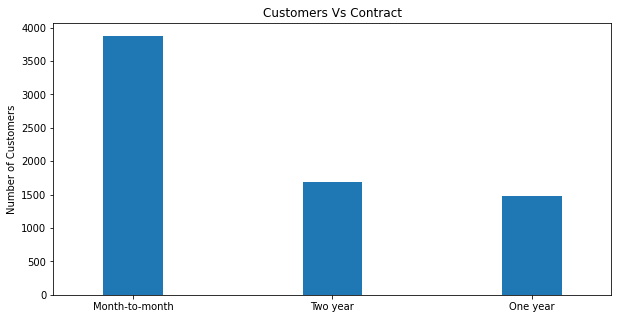

In [ ]:
# reference: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.bar.html

plt.subplots(figsize=(10,5))
bar = df['contract'].value_counts().plot(kind = 'bar',rot = 0, width = 0.3)
bar.set_ylabel('Number of Customers')
bar.set_title('Customers Vs Contract')

##### ii) Services that each customer has signed up for—phone, multiple lines, internet, online security, online backup, device protection, tech support, then visualize plots and describe your observations.

Below graphs indicate the visualization of various services that customers has registered for, and based on we can make following observations,
1.	Most of the customers are opted for phone service, however not all of them signed for device protection plan. 
2.	Majorly and almost equal number of customers are opted for the internet services such as fiber optics and DSL. 
3.	A very high range of customers are not registered for online backup, online security, and tech support services.
4.	Also, customers are not generally preferring multiple lines and streaming TV services.


Text(0.5, 1.0, 'streamingtv')

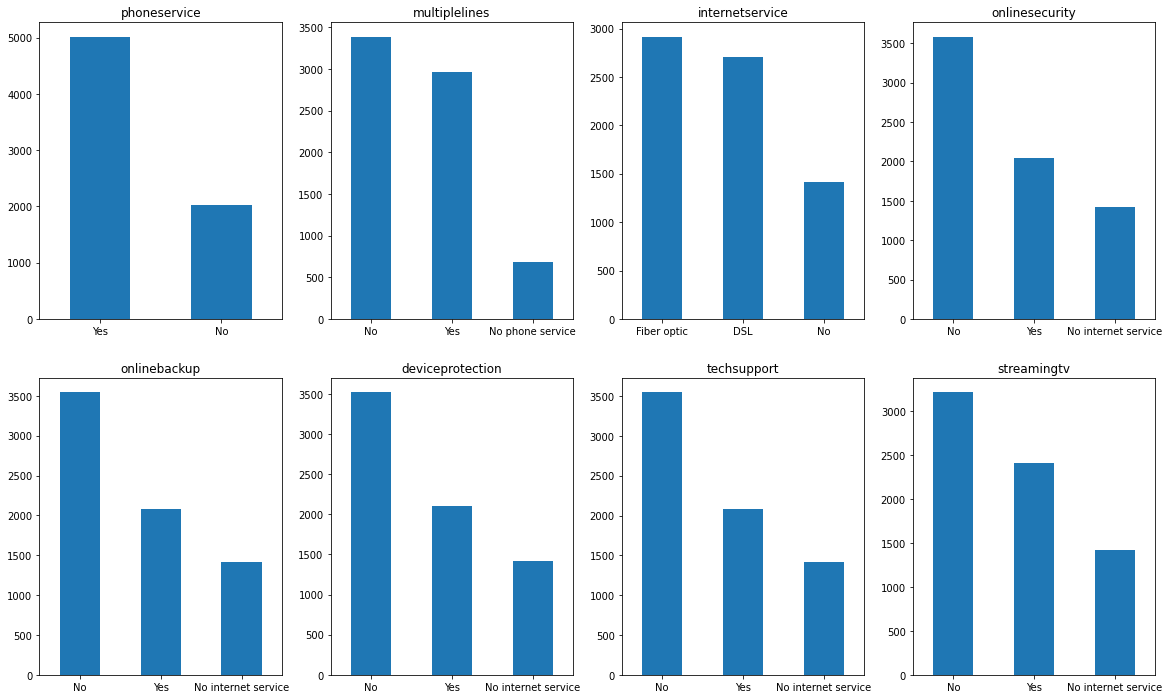

In [ ]:
fig, axes = plt.subplots(2, 4,figsize = (20,12))
bar = df['phoneservice'].value_counts().plot(kind = 'bar',rot = 0, ax=axes[0, 0])
bar.set_title('phoneservice')

bar = df['multiplelines'].value_counts().plot(kind = 'bar',rot = 0, ax=axes[0, 1])
bar.set_title('multiplelines')

bar = df['internetservice'].value_counts().plot(kind = 'bar',rot = 0, ax=axes[0, 2])
bar.set_title('internetservice')

bar = df['onlinesecurity'].value_counts().plot(kind = 'bar',rot = 0, ax=axes[0, 3])
bar.set_title('onlinesecurity')

bar = df['onlinebackup'].value_counts().plot(kind = 'bar',rot = 0, ax=axes[1, 0])
bar.set_title('onlinebackup')

bar = df['deviceprotection'].value_counts().plot(kind = 'bar',rot = 0, ax=axes[1, 1])
bar.set_title('deviceprotection')

bar = df['techsupport'].value_counts().plot(kind = 'bar',rot = 0, ax=axes[1, 2])
bar.set_title('techsupport')

bar = df['streamingtv'].value_counts().plot(kind = 'bar',rot = 0, ax=axes[1, 3])
bar.set_title('streamingtv')


### Task 2. Build a baseline model to predict customer churn 

#### Split the dataset into training (40%), validation (30%), and test (30%) splits. 

In [ ]:
# Features
X = dummy_df.drop(['churn'], axis=1)
# Target
y = dummy_df['churn']

In [ ]:
# reference: https://towardsdatascience.com/how-to-split-data-into-three-sets-train-validation-and-test-and-why-e50d22d3e54c

from sklearn.model_selection import train_test_split

# Let's say we want to split the data in 40:30:30 for train:valid:test dataset
train_size=0.4

# In the first step we will split the data in training and remaining dataset
X_rem, X_test, y_rem, y_test = train_test_split(X,y, test_size=0.3)

# Now since we want the valid and test size to be equal (30% each of overall data). 
# we have to define valid_size=0.5 (that is 50% of remaining data)
test_size = 0.5
X_train, X_valid, y_train, y_valid = train_test_split(X_rem,y_rem, train_size=4/7)

print("X_train dataset: ", X_train.shape)
print("y_train dataset: ", y_train.shape)
print("X_test dataset: ", X_test.shape)
print("y_test dataset: ", y_test.shape)
print("X_valid dataset: ", X_valid.shape)
print("y_valid dataset: ", y_valid.shape)

X_train dataset:  (2817, 19)
y_train dataset:  (2817,)
X_test dataset:  (2113, 19)
y_test dataset:  (2113,)
X_valid dataset:  (2113, 19)
y_valid dataset:  (2113,)


#### A. Explain what the task you’re solving is (e.g., supervised x unsupervised, classification x regression x clustering or similarity matching x, etc).

As we have considered Chrun as a target variable and based on analysis of given dataset, we have decided to use supervised machine learning algorithms. Supervised machine learning learns from the labeled training data and predict outcomes for unforeseen data. So, we believed that it fits more with given problems. 

Also, we have decided to use classification technique to investigate the relationship between independent variables and a dependent variable. It’s used as a machine learning model or algorithm to predict categorical outcomes. Therefore, as we need to predict the Churn value for unknown data, we believed that classification would be the best suitable technique. 



#### B. Use a feature selection method to select the features to build a model.

Feature selection is very important task in the machine learning practice because it improves the machine learning process and increases the predictive power of machine learning algorithms or models by selecting the most important variables and eliminating redundant or unnecessary features. 

We have used correlation matrix to find correlation between features. So, to generate correlation matrix and implement feature selection task, we have used f_classif and SelectKBest which are imported from the sklearn library to implement feature selection task and identify best suitable features.Below figure indicates the 7 selected features which are more correlated with the Churn feature compared to rest of other features. So, all rest of features has been removed from the dataset. 


List of top 7 most correlated features
('contract', 1315.0888722077957)
('tenure', 997.2680104991443)
('totalcharges', 288.2789610222051)
('monthlycharges', 273.4637042077125)
('dependents', 195.1493137732415)
('seniorcitizen', 164.04142445613567)
('partner', 163.06003598399556)


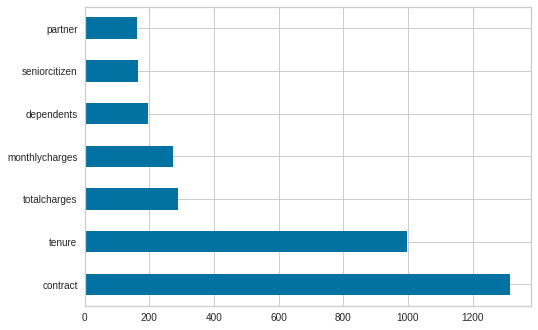

In [ ]:
# reference: https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

fs = SelectKBest(score_func=f_classif, k=7)
X_new = fs.fit_transform(X, y)
top_features = sorted(zip(X.columns, fs.scores_), key=lambda x: x[1], reverse=True)

print("List of top 7 most correlated features")
for feature in top_features[:7]: 
  print(feature)

feat_importances = pd.Series(fs.scores_, index=X.columns)
feat_importances.nlargest(7).plot(kind='barh')
plt.show()

In [ ]:
# considering top 7 features
top_column_names = [x[0] for x in top_features[:7]]
X = X[top_column_names]
X.head()

train_size=0.4
X_rem, X_test, y_rem, y_test = train_test_split(X,y, test_size=0.3)

test_size = 0.5
X_train, X_valid, y_train, y_valid = train_test_split(X_rem,y_rem, train_size=4/7)

#### C. Select the evalution metric. Justify your choice.

It is necessary to obtain the accuracy on training data, with that it is also important to get a genuine and approximate result on unseen data otherwise Model is of no use. So, to build and deploy a generalized model we require to Evaluate the model on different metrics which helps us to better optimize the performance, fine-tune it, and obtain a better result. 
We have used two different metrics for evaluating the machine learning model. 

1.	Confusion Matrix:
A confusion matrix is a table that is often used to describe the performance of a classification model (or "classifier") on a set of test data for which the true values are known. The numbers which will be generated are used to describe the number of accurate and inaccurate predictions for each class.
*	True positives (TP): These are cases in which we predicted yes (they have the disease), and they acutually do have yes.
*	True negatives (TN): We predicted no, and they actually do have no.
*	False positives (FP): We predicted yes, but they actually don't have the yes
*	False negatives (FN): We predicted no, but they actually don't have the no. 

So, using these values we can calculate various types of rates such as accuracy, precision, prevalence, etc. 

2.	Classification Report: 
The classification report visualizer displays the precision, recall, F1, and support scores for the model. In order to support easier interpretation and problem detection, the report integrates numerical scores with a color-coded heatmap. All heatmaps are in the range (0.0, 1.0) to facilitate easy comparison of classification models across different classification reports.


#### D. Perform hyperparamter tuning if applicable. 

In machine learning, hyperparameter optimization or tuning is the problem of choosing a set of optimal hyperparameters for a learning algorithm. A hyperparameter is a parameter whose value is used to control the learning process. If we don't correctly tune our hyperparameters, our estimated model parameters produce suboptimal results, as they don't minimize the loss function. This means our model makes more errors.

We have used **Grid Search** techniques to perform hyperparameter tuning. Grid search is the simplest algorithm for hyperparameter tuning. Basically, we divide the domain of the hyperparameters into a discrete grid. Then, we try every combination of values of this grid, calculating some performance metrics using cross-validation. As we are going to use LogisticRegression as a baseline model, we have decided parameters to created grid based on that. We have tried ‘newton-cg’, ‘lbfgs’, ‘liblinear’ as three different solvers, have considered ‘l2’ as a penalty, and several values as a C such as ‘1e-5’, ‘1e-4’, ‘1e-3’, ‘1e-2’, ‘1e-1’, ‘1’, ‘10’, ‘100’. After tried every combination with LogisticRegression, we have received {'C': 1, 'penalty': 'l2', 'solver': 'newton-cg'}, the most suitable parameters that works most efficiently with the model and predict more prominent outcomes. 


In [ ]:
# reference: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
# reference: https://machinelearningmastery.com/hyperparameters-for-classification-machine-learning-algorithms/

from sklearn.model_selection import GridSearchCV, RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression

regr_model = LogisticRegression(solver="liblinear", random_state=42)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

params = {
    'solver': ['newton-cg', 'lbfgs', 'liblinear'],
    'penalty': ['l2'],
    'C': [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100]
}

# define search
grid_search = GridSearchCV(estimator=regr_model, param_grid=params, scoring='accuracy', n_jobs=-1, cv=cv)

In [ ]:
%%time
regr_model = grid_search.fit(X_train, y_train)

CPU times: user 1.8 s, sys: 168 ms, total: 1.97 s
Wall time: 22 s


In [ ]:
print('Best Score: %s' % regr_model.best_score_)
print('Best Hyperparameters: %s' % regr_model.best_params_)

Best Score: 0.7868844804522853
Best Hyperparameters: {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}


### E. Train and evaluate your model on test data

In [ ]:
# predict training data
y_regr_train_pred = regr_model.predict(X_train)
y_regr_train_pred

array([0, 0, 1, ..., 0, 0, 0])

In [ ]:
# predict testing data
y_regr_test_pred = regr_model.predict(X_test)
y_regr_test_pred

array([0, 0, 0, ..., 0, 0, 0])

Confusion Matrix on testing data : 
 [[ 254  142]
 [ 304 1413]]
Accuracy of the Model is:  78.8926 %
              precision    recall  f1-score   support

           0       0.82      0.91      0.86      1555
           1       0.64      0.46      0.53       558

    accuracy                           0.79      2113
   macro avg       0.73      0.68      0.70      2113
weighted avg       0.78      0.79      0.78      2113



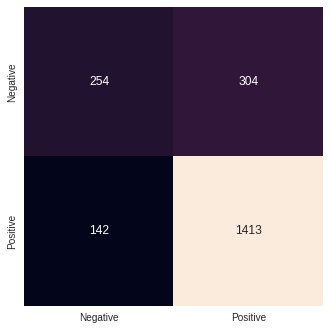

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn import metrics

CM = confusion_matrix( y_regr_test_pred, y_test, labels=[1,0])
print('Confusion Matrix on testing data : \n', CM)
sns.heatmap(CM.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])

print('Accuracy of the Model is: ', round(metrics.accuracy_score(y_test, y_regr_test_pred)*100, 4), '%')
print(classification_report(y_test,y_regr_test_pred))

#### F. How do you make sure that your model is not overfitting the data?

In overfiting problem, a model tries to fit the training data entirely and ends up memorizing the data pattens as well as noise. So, these models fail to generalize and perform well in the case of unseen data and ruining the purpose of the model. To make sure that model not overfit the data, we have performed following steps, 
1.	Generate Data quality report and identified data quality issues. According to that, processed the data and remove smell from the dataset.
2.	Performed hyperparameter Turning to identify the parameter in that model performs most efficiently.
3.	Used feature selection techniques to select best correlated features.
4.	Plot the boxplot to identify the outliers. According to the below figure, there are no outliers found.


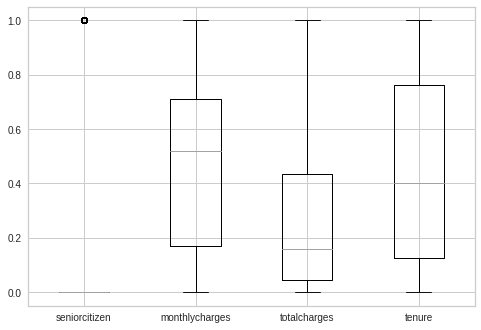

In [ ]:
# No outliers are found
df.boxplot()

### G. Plot the learning curve. What can you conclude from this plot?

A learning curve plots the optimal value of a model's loss function for a training set against this loss function evaluated on a validation data set with same parameters as produced the optimal function. We have plotted two learning curves using two different libraries such as sklearn, and mlxtend. 

In [ ]:
# reference: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.learning_curve.html

from sklearn.model_selection import learning_curve
train_sizes, train_scores, test_scores = learning_curve(regr_model, X_train, y_train, scoring='accuracy')

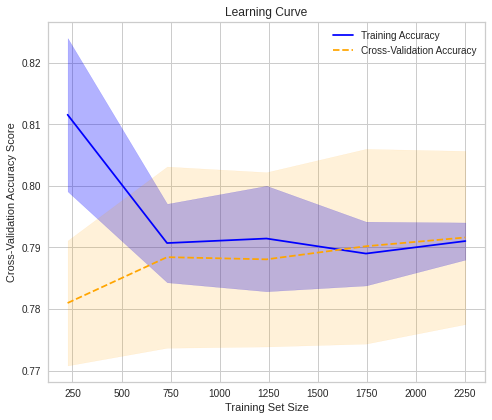

In [ ]:
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.subplots(1, figsize=(7,6))
plt.plot(train_sizes, train_mean, color='blue', label='Training Accuracy')
plt.plot(train_sizes, test_mean, color='orange', linestyle='--', label='Cross-Validation Accuracy')

plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.30, color='blue')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std,alpha=0.15, color='orange')

plt.title("Learning Curve")
plt.xlabel("Training Set Size"), plt.ylabel("Cross-Validation Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

([0.199288256227758,
  0.216696269982238,
  0.20236686390532543,
  0.19982238010657194,
  0.20525568181818182,
  0.21005917159763313,
  0.2100456621004566,
  0.20905459387483355,
  0.20591715976331362,
  0.20766773162939298],
 [0.21911973497397066,
  0.21769995267392334,
  0.21675343114055845,
  0.22006625650733555,
  0.2172266919072409,
  0.21864647420728822,
  0.21533364884051112,
  0.21344060577378135,
  0.21438712730714624,
  0.2129673450070989])

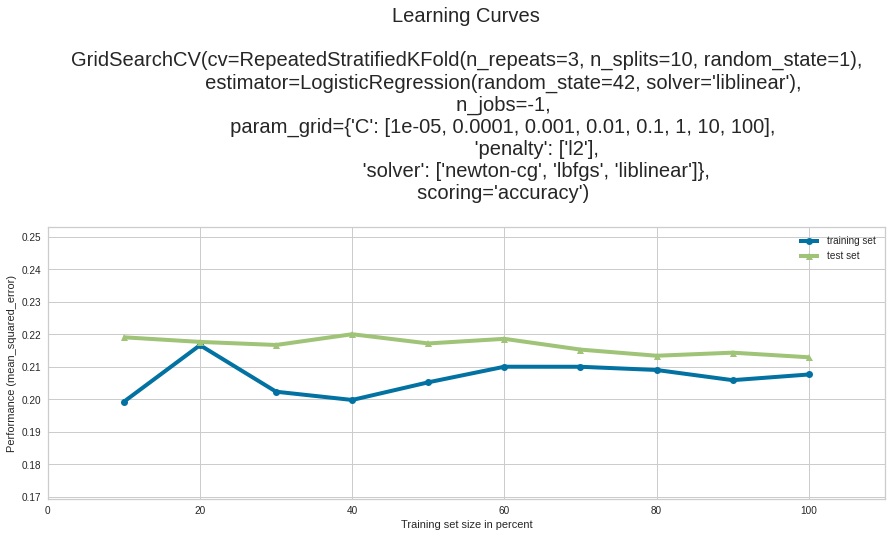

In [ ]:
# reference: http://rasbt.github.io/mlxtend/user_guide/plotting/plot_learning_curves/

from mlxtend.plotting import plot_learning_curves
plt.subplots(figsize=(15,5))
plot_learning_curves(X_train, y_train, X_test, y_test, regr_model, scoring='mean_squared_error')

By analyzing both of these learning curve, we can say that model is not performing appropriately when the training data size is less than 20%. However, it started working efficiently and generating desired outcomes as training size increase and model gets trained more. 

### H. Analyze and discuss model performance. 

Based on the generated evolution matrixes and learning curve, we can say that model is working prominently in most of the case. It has accuracy of slightly more than 78 percent, which is considered as good when the dataset is not that much large to train the model and contains some data smells. 

However, this accuracy can be exceeded by selecting most correlated features with the predicted attributes, also by defining more efficient hyperparameters of the model. 


## Task 3. Build a NN model to predict customer churn 

#### A. Explain what the task you’re solving is (e.g., supervised x unsupervised, classification x regression x clustering or similarity matching x, etc).

As we known that Chrun is a target variable and based on analysis of given dataset, we have decided to use supervised machine learning algorithms. So, here we are using the Neural Networks that is supervised machine leaning technique, we are using that to predict the customer churn. 

#### B. Use a feature selection method to select the features to build a model.

We know that identify the most correlated features is quite important task, that should be done before train any model. So, we have used correlation matrix same as we have done during baseline model to find correlation between features. So, to generate correlation matrix and implement feature selection task, we have used chi-squared statistics and SelectKBest which are imported from the sklearn library to implement feature selection task and identify best suitable features. Below figure indicates the 7 selected features which are more correlated with the Churn feature compared to rest of other features. So, all rest of features has been removed from the dataset. These 7 features are same as we have identified during the LogisticRegression model. 

List of top 7 most correlated features
('contract', 1115.7801669729258)
('tenure', 226.096162297877)
('seniorcitizen', 134.35154479888715)
('dependents', 133.03644287868082)
('partner', 82.41208263843043)
('totalcharges', 71.88329069221064)
('monthlycharges', 50.99537082443224)


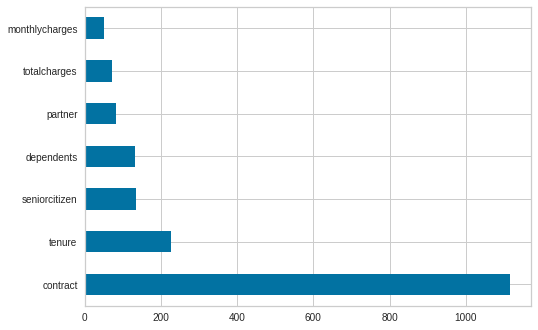

In [ ]:
# Feature Selection 
from sklearn.feature_selection import chi2

fs = SelectKBest(score_func=chi2, k=7)
X_new = fs.fit_transform(X, y)
top_features = sorted(zip(X.columns, fs.scores_), key=lambda x: x[1], reverse=True)

print("List of top 7 most correlated features")
for feature in top_features[:7]: 
  print(feature)

feat_importances = pd.Series(fs.scores_, index=X.columns)
feat_importances.nlargest(7).plot(kind='barh')
plt.show()

# considering top 7 features
top_column_names = [x[0] for x in top_features[:7]]
X = X[top_column_names]

train_size=0.4
X_rem, X_test, y_rem, y_test = train_test_split(X,y, test_size=0.3)

test_size = 0.5
X_train, X_valid, y_train, y_valid = train_test_split(X_rem,y_rem, train_size=4/7)

#### C. Select the evaluation metric. Justify your choice.

We have used classification report metrics for evaluating the machine learning model. 
1.	Classification Report: 
The classification report visualizer displays the precision, recall, F1, and support scores for the model. In order to support easier interpretation and problem detection, the report integrates numerical scores with a color-coded heatmap. All heatmaps are in the range (0.0, 1.0) to facilitate easy comparison of classification models across different classification reports.


#### D. Perform hyperparameter tuning if applicable.

We have not performed hyperparameter tuning as model is already working efficiently and predicting desired outcomes. However, we have used keras sequential () method to generate neural network model. During the configuration of this NN model, we have decided to make total 5 layers model, including input and output layer.  In that, we have used 16, 12, 8, 4, 1 numbers of nodes in layers respectively, and used ‘relu’ as an activation function. Also, we have used ‘adam’ optimizer, ‘binary_crossentropy’ loss function during the compilation of the model. 

In [ ]:
# reference: https://keras.io/api/models/sequential/

from keras.models import Sequential
from keras.layers import Dense, LSTM
from keras.layers.embeddings import Embedding

In [ ]:
# Building Neural network
top_words = 5000
max_review_length = 7
embedding_vecor_length = 32

model = Sequential()

model.add(Dense(16, input_dim=7, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(1))

In [ ]:
from keras import optimizers
from keras import backend as K
 
model.compile(optimizer ='adam',loss='binary_crossentropy', metrics =['accuracy'])
# K.set_value(model.optimizer.learning_rate, 0.7)

#### E. Train and evaluate your model on test data

We have first trained the model using split training data (X_train, and y_train). Also, we have considered epochs=50, and batch_size = 64 during the training the model. Once the model gets trained, we have predicted the churn on testing data, and we have received slightly less than 79 percent accuracy. Below figure indicates the classification report which is generated by prediction testing data using created neural network. 

In [ ]:
history = model.fit(X_train, y_train, epochs=50, batch_size=64, validation_split=3/7, shuffle=True)

Epoch 1/50
26/26 [==============================] - 1s 12ms/step - loss: 0.6372 - accuracy: 0.7303 - val_loss: 0.5753 - val_accuracy: 0.7161
Epoch 2/50
26/26 [==============================] - 0s 5ms/step - loss: 0.5318 - accuracy: 0.7328 - val_loss: 0.5066 - val_accuracy: 0.7334
Epoch 3/50
26/26 [==============================] - 0s 5ms/step - loss: 0.4835 - accuracy: 0.7502 - val_loss: 0.4808 - val_accuracy: 0.7368
Epoch 4/50
26/26 [==============================] - 0s 5ms/step - loss: 0.4671 - accuracy: 0.7446 - val_loss: 0.4695 - val_accuracy: 0.7434
Epoch 5/50
26/26 [==============================] - 0s 3ms/step - loss: 0.4589 - accuracy: 0.7576 - val_loss: 0.4631 - val_accuracy: 0.7525
Epoch 6/50
26/26 [==============================] - 0s 4ms/step - loss: 0.4495 - accuracy: 0.7713 - val_loss: 0.4585 - val_accuracy: 0.7608
Epoch 7/50
26/26 [==============================] - 0s 3ms/step - loss: 0.4450 - accuracy: 0.7806 - val_loss: 0.4554 - val_accuracy: 0.7806
Epoch 8/50
26/26 [=

In [ ]:
#Making predictions and generate model evalution report
y_nn_test_predict = (model.predict(X_test) > 0.5).astype(int)
print('Accuracy of the Model is: ', round(metrics.accuracy_score(y_test, y_nn_test_predict)*100, 4), '%')
print(classification_report(y_test,y_nn_test_predict))


Accuracy of the Model is:  77.8041 %
              precision    recall  f1-score   support

           0       0.82      0.90      0.86      1567
           1       0.60      0.42      0.50       546

    accuracy                           0.78      2113
   macro avg       0.71      0.66      0.68      2113
weighted avg       0.76      0.78      0.76      2113



#### F. How do you make sure that your model is not overfitting the data?

To make sure that model not overfit the data, we have performed following steps, 
1.	Generate Data quality report and identified data quality issues. According to that, processed the data and remove smell from the dataset.
2.	By removing some layers or reducing the number of neurons the network becomes less prone to overfitting as the neurons contributing to overfitting are removed or deactivated
3.	Also, by increasing the size or providing the adequate number of the training dataset.


#### G. Plot the learning curve. What can you conclude from this plot?

A learning curve plots the optimal value of a model's loss function for a training set against this loss function evaluated on a validation data set with same parameters as produced the optimal function. We have plotted learning curve using mlxtend library.

Below figure indicates the generated learning curve of the neural network model. From the graph, we can identify that model is working more efficiently than previous baseline model and learning curve of the training dataset is almost similar as learning of the testing dataset.


89/89 [==============================] - 0s 2ms/step - loss: 0.4336 - accuracy: 0.7874


([0.1350862937879816,
  0.14122955556659914,
  0.1373410599026706,
  0.13625209901063626,
  0.13924510887435163,
  0.1388443183191798,
  0.13984860226680274,
  0.13946075073965913,
  0.1387208391464051,
  0.14223794204889892],
 [0.14516793141119017,
  0.14236388080760182,
  0.14257723312231954,
  0.1426237790112706,
  0.14256058701111993,
  0.14423493654687605,
  0.14287510726255317,
  0.14244774060425539,
  0.14279783543853874,
  0.14667596638836014])

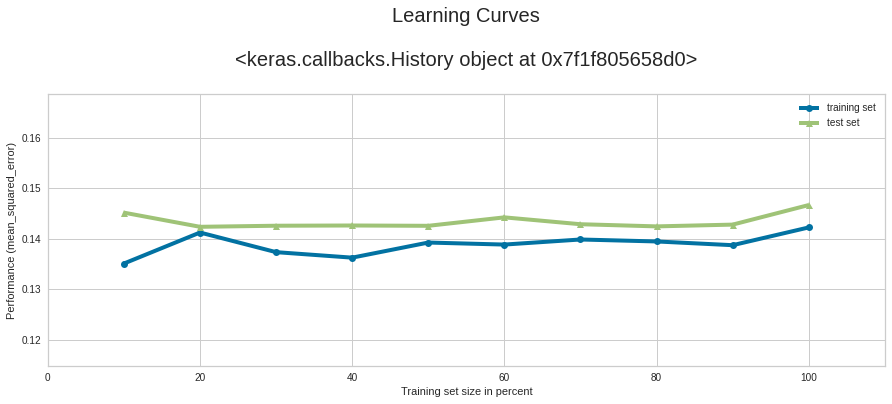

In [ ]:
plt.subplots(figsize=(15,5))
plot_learning_curves(X_train, y_train, X_test, y_test, model, scoring='mean_squared_error')

#### H. Analyze and discuss model performance. 

Based on the generated evolution matrixes and learning curve, we can say that model is working more prominently than the baseline model. Below figure indicates the NN model’s accuracy and loss curves through all 50 epochs. We can see that model’s learning curve for training and testing dataset are same. 

As the loss curves are going smoothly down, meaning the model improves as it is training dataset size increases, which is good. The test loss is slightly higher than the training loss, meaning the model is slightly overfitting the training data, but that’s inevitable, it doesn’t seem problematic. 

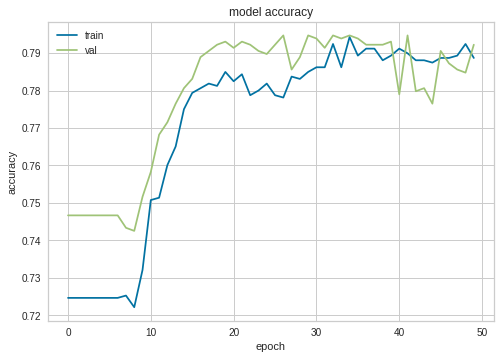

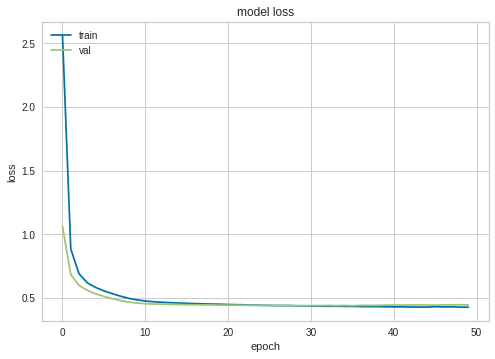

In [ ]:
# reference: https://machinelearningmastery.com/learning-curves-for-diagnosing-machine-learning-model-performance/

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

#### Compare the models to your baseline model with a statistical significance test. Use a box plot to visualize your comparison.

We have used Cross Validation Score metrics to compare both (LogisticRegression and Neural Network) models. As we have performed classification technique, “neg_mean_squared_error” of both models will be compared, and for the comparison we have plotted the box plot for both models.  

To draw the box plots for both models, we first calculated the cross_validation_results for LogisticRegression model and NN model. Then using matplotlib library, we plotted the boxplots of both models. 


In [ ]:
from sklearn.model_selection import cross_val_score
from keras.wrappers.scikit_learn import KerasClassifier

In [ ]:
# reference: https://machinelearningmastery.com/compare-machine-learning-algorithms-python-scikit-learn/
model_results = []

cv_results = cross_val_score(regr_model,X_train, y_train,scoring = 'neg_mean_squared_error', cv=5)
cv_results = np.sqrt(-cv_results)
model_results.append(cv_results)

In [ ]:
# reference: https://stackoverflow.com/questions/53906313/sklearn-cross-val-score-with-multi-input-kerasclassifier
def create_model():
  nn_model = Sequential() 
  nn_model.add(Dense(16, input_dim=7, activation='relu'))
  nn_model.add(Dense(12, activation='relu'))
  nn_model.add(Dense(8, activation='relu'))
  nn_model.add(Dense(4, activation='relu'))
  nn_model.add(Dense(1))

  nn_model.compile(optimizer ='adam',loss='binary_crossentropy', metrics =['accuracy'])

  return nn_model

neural_network = KerasClassifier(build_fn=create_model, epochs=10, batch_size=100, verbose=0)

cv_results = cross_val_score(neural_network,X_train, y_train,scoring = 'neg_mean_squared_error', cv=5)
cv_results = np.sqrt(-cv_results)
model_results.append(cv_results)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  


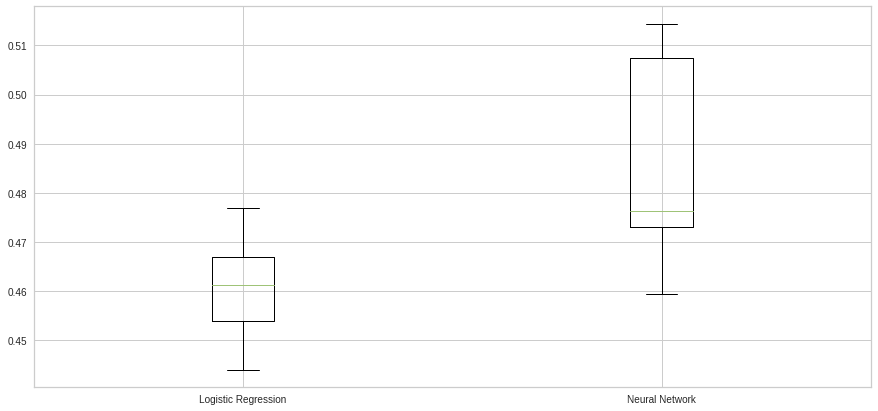

In [ ]:
plt.figure(figsize=(15,7))
plt.boxplot(model_results, labels=['Logistic Regression', 'Neural Network'])
plt.show()

## Task 4. Concept drift detection

### Use concept drift methods and find out if there is any drift in the data that can be detected. If so, what type of drift is that? Suggest specific actions to adapt your model to the new concept.

Identifying concept drift is the process of detecting changes in the relationships within datasets. This could be steady change over time, periodic or recurring changes as with seasonal data or sudden sweeping changes. 

We have used ADWIN (adaptive sliding window), which is an adaptive sliding window algorithm for detecting change and keeping updated statistics about a data stream. The main idea of ADWIN is to keep statistics from a window of variable size while detecting concept drift. Changes are detected by testing whether the difference between the averages of two sub-windows is larger than a given threshold.

We have installed and used scikit-multiflow package to identify the data drift in streaming data. We have plotted graph of numerical attributes such as TotalCharges, MonthlyCharges, and SeniorCitized, as well as categorical attribute – Churn, to identify the data drift. However, our dataset doesn’t contain any type of drift. Below figures are indicating the data drift diagrams. 


In [ ]:
# reference: https://scikit-multiflow.readthedocs.io/en/stable/api/generated/skmultiflow.drift_detection.ADWIN.html
from skmultiflow.drift_detection import ADWIN

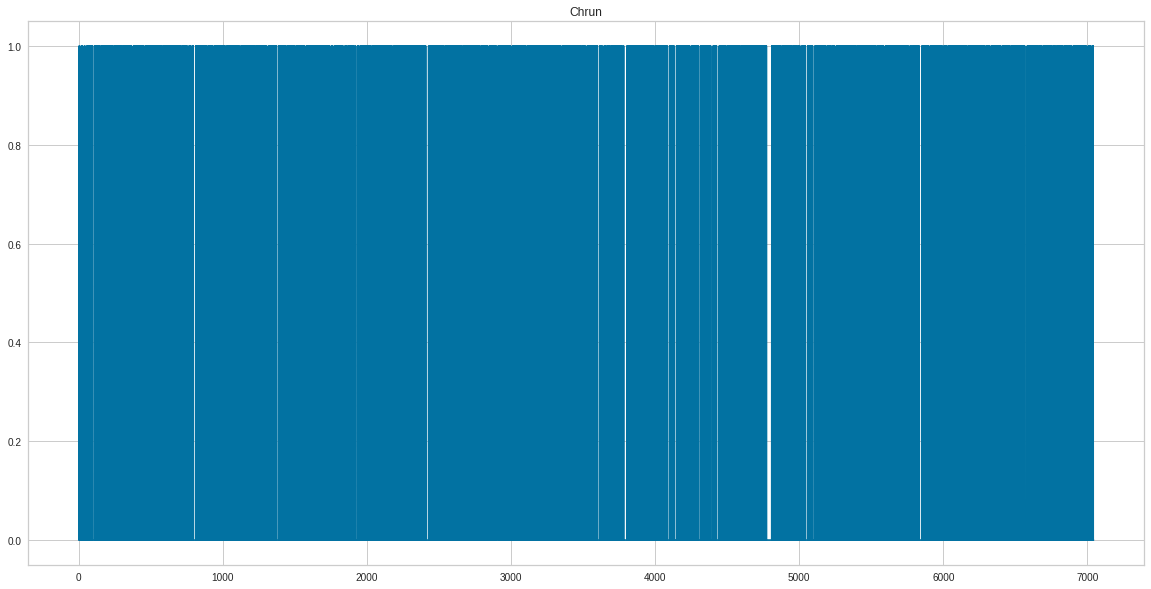

In [ ]:
# Find data drift on Churn - Continous feature
drift_stream = dummy_df['churn']

plt.figure(figsize=(20, 10))
plt.plot(drift_stream)
plt.title('Chrun') 

# instantiate ADWIN object 
adwin = ADWIN(delta=.0002)

# for each data point in stream 
for i in range(drift_stream.size):
    # add a new point to adwin object
    adwin.add_element(drift_stream[i])
    
    # if adwin detects change, print at what point in the stream 
    # the change was detected
    if adwin.detected_change():
        print('Change detected at index {}'.format(i))

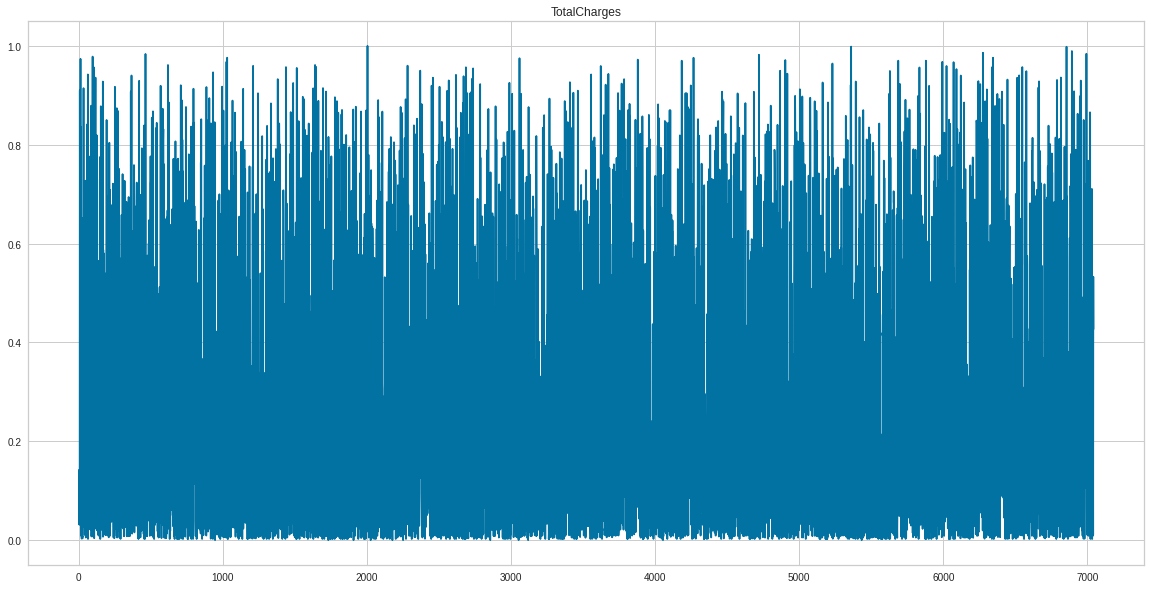

In [ ]:
# Find data drift on TotalCharges - Numerical feature
drift_stream = df['totalcharges']

plt.figure(figsize=(20, 10))
plt.plot(drift_stream)
plt.title('TotalCharges') 

# instantiate ADWIN object 
adwin = ADWIN(delta=.0002)

# for each data point in stream 
for i in range(drift_stream.size):
    # add a new point to adwin object
    adwin.add_element(drift_stream[i])
    
    # if adwin detects change, print at what point in the stream 
    # the change was detected
    if adwin.detected_change():
        print('Change detected at index {}'.format(i))

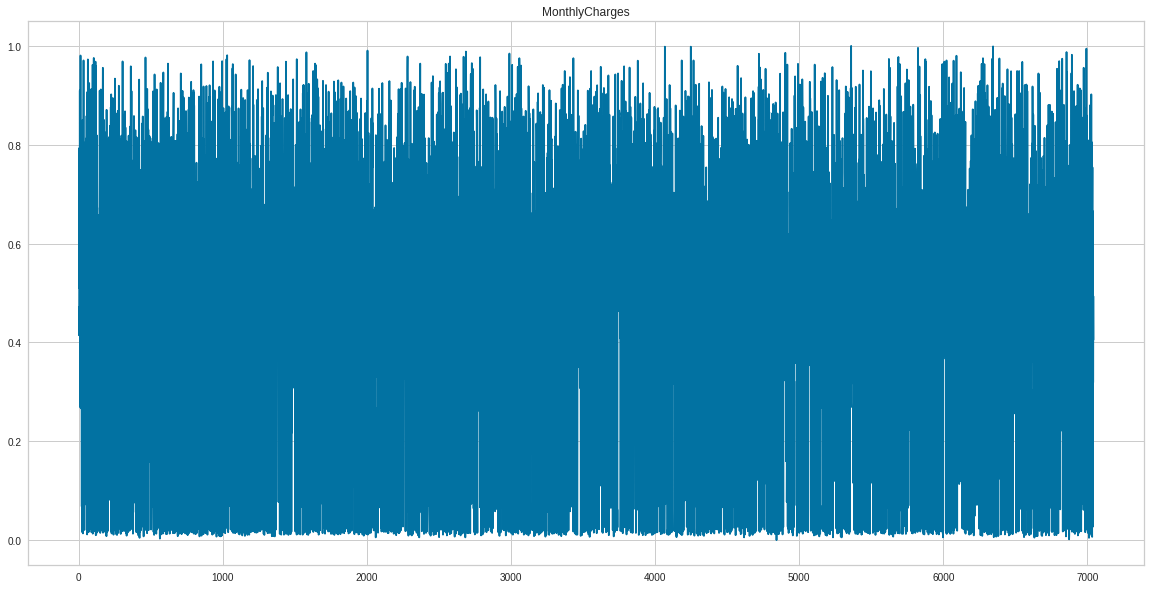

In [ ]:
# Find data drift on MonthlyCharges - Numerical feature
drift_stream = df['monthlycharges']

plt.figure(figsize=(20, 10))
plt.plot(drift_stream)
plt.title('MonthlyCharges') 

# instantiate ADWIN object 
adwin = ADWIN(delta=.0002)

# for each data point in stream 
for i in range(drift_stream.size):
    # add a new point to adwin object
    adwin.add_element(drift_stream[i])
    
    # if adwin detects change, print at what point in the stream 
    # the change was detected
    if adwin.detected_change():
        print('Change detected at index {}'.format(i))

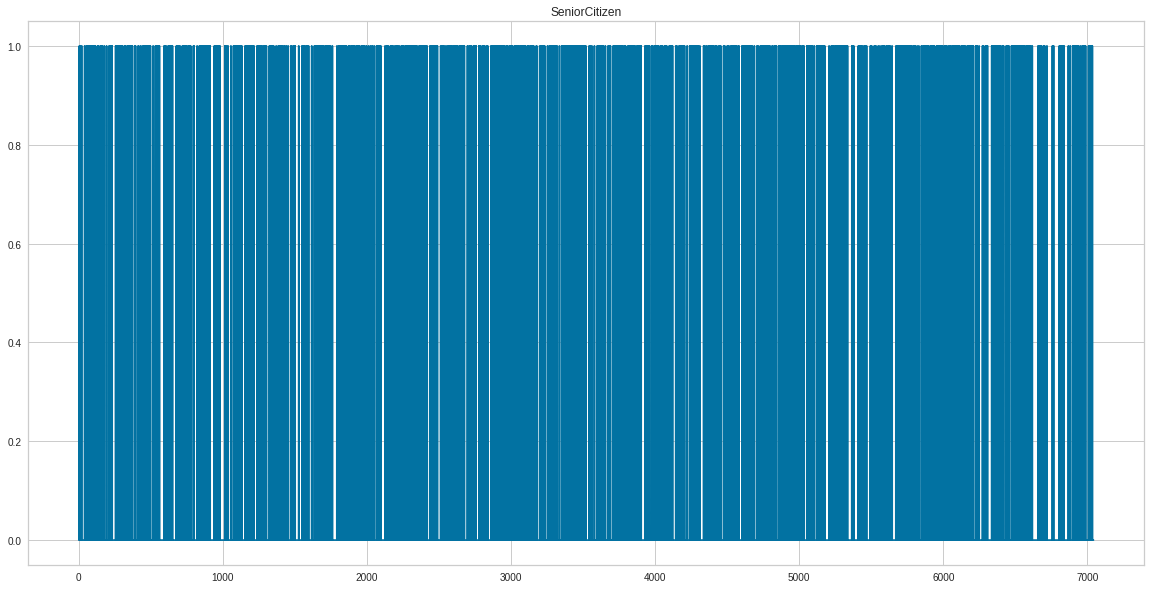

In [ ]:
# Find data drift on SeniorCitizen - Numerical feature
drift_stream = df['seniorcitizen']

plt.figure(figsize=(20, 10))
plt.plot(drift_stream)
plt.title('SeniorCitizen') 

# instantiate ADWIN object 
adwin = ADWIN(delta=.0002)

# for each data point in stream 
for i in range(drift_stream.size):
    # add a new point to adwin object
    adwin.add_element(drift_stream[i])
    
    # if adwin detects change, print at what point in the stream 
    # the change was detected
    if adwin.detected_change():
        print('Change detected at index {}'.format(i))

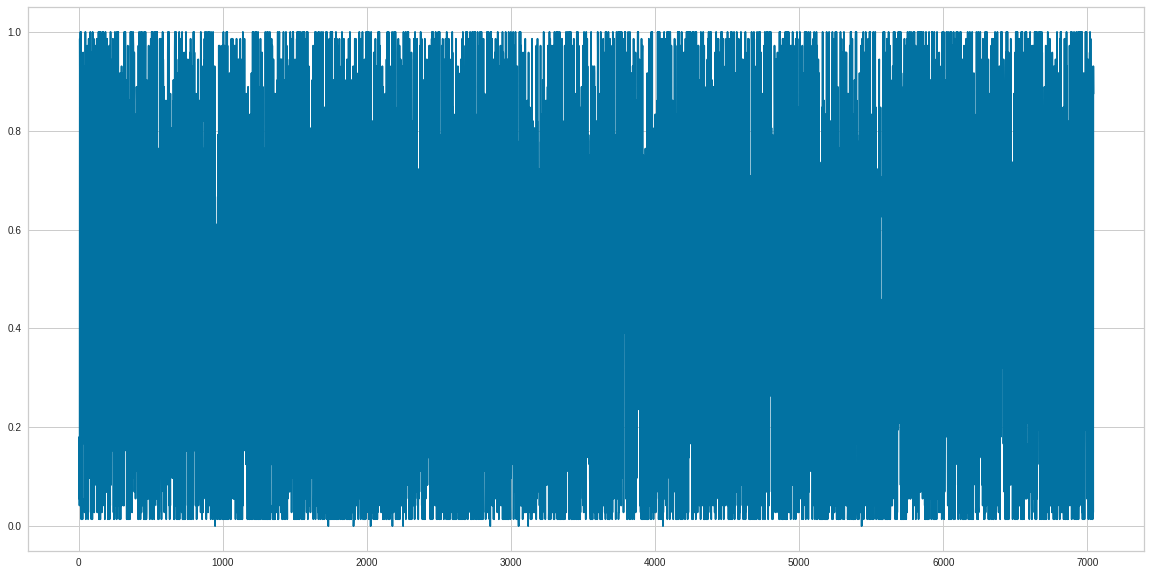

In [ ]:
# Find data drift on tenure - Numerical feature
drift_stream = df['tenure']

plt.figure(figsize=(20, 10))
plt.plot(drift_stream)

# instantiate ADWIN object 
adwin = ADWIN(delta=.0002)

# for each data point in stream 
for i in range(drift_stream.size):
    # add a new point to adwin object
    adwin.add_element(drift_stream[i])
    
    # if adwin detects change, print at what point in the stream 
    # the change was detected
    if adwin.detected_change():
        print('Change detected at index {}'.format(i))

References

[1] 	P. Schwan, "Setting up data quality reports with pandas (in no time)," 15 November 2020. [Online]. Available: https://www.pschwan.de/how-to/setting-up-data-quality-reports-with-pandas-in-no-time. [Accessed 16 June 2022].

[2] 	metersk, "Python, Pandas : Return only those rows which have missing values," stackoverflow.com, [Online]. Available: https://stackoverflow.com/questions/30447083/python-pandas-return-only-those-rows-which-have-missing-values. [Accessed 13 July 2022].

[3] 	NNK, "Pandas – Replace NaN Values with Zero in a Column," sparkbyexamples.com, [Online]. Available: https://sparkbyexamples.com/pandas/pandas-replace-nan-values-by-zero-in-a-column/. [Accessed 13 July 2022].

[4] 	Sandman, "Normalize columns of pandas data frame," stackoverflow.com, [Online]. Available: https://stackoverflow.com/questions/26414913/normalize-columns-of-pandas-data-frame. [Accessed 13 July 2022].

[5] 	R. Pekar, "How can I make pandas dataframe column headers all lowercase?," stackoverflow.com, [Online]. Available: https://stackoverflow.com/questions/19726029/how-can-i-make-pandas-dataframe-column-headers-all-lowercase. [Accessed 13 July 2022].

[6] 	"sklearn.preprocessing.OrdinalEncoder," scikit-learn.org, [Online]. Available: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OrdinalEncoder.html. [Accessed 13 July 2022].

[7] 	"Display the Pandas DataFrame in Heatmap style," GeeksforGeeks, [Online]. Available: https://www.geeksforgeeks.org/display-the-pandas-dataframe-in-heatmap-style/. [Accessed 13 July 2022].

[8] 	"seaborn.distplot," seaborn, [Online]. Available: https://seaborn.pydata.org/generated/seaborn.distplot.html. [Accessed 13 July 2022].

[9] 	"matplotlib.pyplot.bar - MatplotLib," matplotlib.org, [Online]. Available: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.bar.html. [Accessed 13 July 2022].

[10] 	S. Agrawal, "How to split data into three sets (train, validation, and test) And why?," https://towardsdatascience.com/, [Online]. Available: https://towardsdatascience.com/how-to-split-data-into-three-sets-train-validation-and-test-and-why-e50d22d3e54c. [Accessed 13 July 2022].

[11] 	"sklearn.feature_selection.SelectKBest," scikit-learn.org, [Online]. Available: https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html. [Accessed 13 July 2022].

[12] 	J. Brownlee, "Tune Hyperparameters for Classification Machine Learning Algorithms," machinelearningmastery.com, [Online]. Available: https://machinelearningmastery.com/hyperparameters-for-classification-machine-learning-algorithms/. [Accessed 13 July 2022].

[13] 	S. Raschka, "plot_learning_curves: Plot learning curves from training and test sets," mlxtend, [Online]. Available: http://rasbt.github.io/mlxtend/user_guide/plotting/plot_learning_curves/. [Accessed 13 July 2022].

[14] 	"sklearn.model_selection.learning_curve," scikit-learn.org, [Online]. Available: https://scikit-learn.org/stable/modules/classes.html#module-sklearn.model_selection. [Accessed 13 July 2022].

[15] 	Brownlee, "How to compare machine learning algorithms in python with scikit-learn," 27 August 2020. [Online]. Available: https://machinelearningmastery.com/compare-machine-learning-algorithms-python-scikit-learn/. [Accessed 22 June 2022].

[16] 	"skmultiflow.drift_detection.ADWIN," scikit-multiflow, [Online]. Available: https://scikit-multiflow.readthedocs.io/en/stable/api/generated/skmultiflow.drift_detection.ADWIN.html. [Accessed 13 July 2022].

[17] 	"Sklearn.feature_selection.Selectkbest," [Online]. Available: https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html. [Accessed 20 June 2022].

[18] 	J. Brownlee, "How to use Learning Curves to Diagnose Machine Learning Model Performance," machinelearningmastery.com, [Online]. Available: https://machinelearningmastery.com/learning-curves-for-diagnosing-machine-learning-model-performance/. [Accessed 13 July 2022].


